# Create animals list

In [ ]:
import os, re

animals = []

file_path = os.path.join('..', 'Dataset', 'artefact1', 'classes.txt')
if os.path.exists(file_path):
    data = open(file_path, "r")
    for i in data:
        if len(re.findall("[a-zA-Z]+", i)) > 1:
            animals.extend(re.findall("[a-zA-Z]+", i))
            animals.append(re.findall("[a-zA-Z]+", i)[0] + ' ' + re.findall("[a-zA-Z]+", i)[1])
            animals.append(re.findall("[a-zA-Z]+", i)[0] + '_' + re.findall("[a-zA-Z]+", i)[1])
        else:
            animals.append(re.findall("[a-zA-Z]+", i)[0])
            
more_animals = ['african_buffalo', 'alligator', 'amphibian', 'amur_leopard', 'ants', 'bear', 
                'blue_whale', 'bobcat', 'bull', 'cat', 'chimp', 'chimpanzee', 'cow', 'dog', 
                'dolphin', 'water_buffalo', 'elephant', 'frog', 'giant', 'giant_panda', 
                'goat', 'gorilla', 'horse', 'killer_whale', 'lion', 'lizard', 'monkey', 
                'mouse', 'orangutan', 'ox', 'panda', 'polar_bear', 'rabbit', 'rat', 'rhino', 
                'rhinoceros', 'seal', 'siamese_cat', 'skunk', 'spider_monkey', 'squirrel', 
                'tiger', 'turtle', 'walrus', 'whale']
for i in more_animals:
    if len(re.findall("[a-zA-Z]+", i)) > 1:
        if re.findall("[a-zA-Z]+", i)[0] not in animals:
            animals.append(re.findall("[a-zA-Z]+", i)[0])
            if re.findall("[a-zA-Z]+", i)[1] not in animals:
                animals.append(re.findall("[a-zA-Z]+", i)[1])
                if re.findall("[a-zA-Z]+", i)[0] + '_' + re.findall("[a-zA-Z]+", i)[1] not in animals:
                    animals.append(re.findall("[a-zA-Z]+", i)[0] + ' ' + re.findall("[a-zA-Z]+", i)[1])
                    animals.append(re.findall("[a-zA-Z]+", i)[0] + '_' + re.findall("[a-zA-Z]+", i)[1])
    else:
        if re.findall("[a-zA-Z]+", i)[0] not in animals:
            animals.append(re.findall("[a-zA-Z]+", i)[0])

file_path = os.path.join('..', 'Dataset', 'artefact1', 'animals.txt')
f = open(file_path, "a")
for i in animals:
    f.write(i)
    f.write('\n')
f.close()

# Autoencoder

In [1]:
import numpy as np
import urllib.request
from gensim.utils import simple_preprocess
import os, re

# Download GloVe embeddings
# glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
# urllib.request.urlretrieve(glove_url, "glove.6B.zip")

# import zipfile
# with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
#     zip_ref.extractall("glove.6B")

In [2]:
# Example custom dataset
# custom_sentences = [
#     'african_buffalo', 'alligator', 'amphibian', 'amur_leopard', 
#     'ants', 'bear', 'bird', 'blue_whale', 'bobcat', 'cat', 'chimp', 
#     'chimpanzee', 'cow', 'dog', 'dolphin', 'domestic_water_buffalo', 
#     'eagle', 'elephant', 'fish', 'frog', 'giant', 'giant_panda', 'goat', 
#     'gorilla', 'hen', 'horse', 'killer_whale', 'lion', 'lizard', 'monkey', 
#     'mouse', 'orangutan', 'ostrich', 'ox', 'panda', 'polar_bear', 'rabbit', 
#     'rat', 'rhino', 'rhinoceros', 'rhinoceroses', 'seal', 'sealskin', 
#     'siamese_cat', 'skunk', 'spider_monkey', 'squirrel', 'tiger', 'turtle', 
#     'walrus', 'whale', 'bird', 'fish', 'lion', 'tiger', 'bull'
# ]
animals_list_file_path = os.path.join('..', 'Dataset', 'artefact1', 'animals.txt')
with open(animals_list_file_path, "r") as f:
    custom_sentences = [line[:-1] for line in f]

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embeddings_index = load_glove_embeddings("glove.6B/glove.6B.300d.txt")  # Using 50d GloVe embeddings
print(f"embeddings_index : {type(embeddings_index)} \n")

# Convert sentences to embeddings
def sentence_to_embedding(sentence, embeddings_index):
    words = simple_preprocess(sentence)
    valid_words = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(300) # Using 50d GloVe embeddings

sentence_embeddings = np.array([sentence_to_embedding(sentence, embeddings_index) for sentence in custom_sentences])
print(f"sentence_embeddings : {type(sentence_embeddings)} \n")

embeddings_index : <class 'dict'> 

sentence_embeddings : <class 'numpy.ndarray'> 



In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the size of the input and latent space
input_dim = 300 # 50  # Dimension of GloVe embeddings
latent_dim = 16  # Dimension of latent space

# Input layer
input_layer = Input(shape=(input_dim,))

# Sample Test 1
# Encoder layers
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(latent_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# # Sample Test 2
# # Encoder layers
# encoded = Dense(latent_dim * 4, activation='relu')(input_layer)
# encoded = Dropout(0.2)(encoded)
# encoded = Dense(latent_dim * 2, activation='relu')(encoded)
# encoded = Dropout(0.2)(encoded)
# encoded = Dense(latent_dim, activation='relu')(encoded)

# # Decoder layers
# decoded = Dense(latent_dim * 2, activation='relu')(encoded)
# decoded = Dropout(0.2)(decoded)
# decoded = Dense(latent_dim * 4, activation='relu')(decoded)
# decoded = Dropout(0.2)(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)

# # Sample Test 3
# # Encoder layers
# encoded = Dense(latent_dim * 4, activation='relu')(input_layer)
# encoded = Dense(latent_dim * 2, activation='relu')(encoded)
# encoded = Dense(latent_dim, activation='relu')(encoded)

# # Decoder layers
# decoded = Dense(latent_dim * 2, activation='relu')(encoded)
# decoded = Dense(latent_dim * 4, activation='relu')(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)

# # Sample Test 4
# # Encoder layers
# encoded = Dense(latent_dim * 16, activation='relu')(input_layer)
# encoded = Dense(latent_dim * 8, activation='relu')(encoded)
# encoded = Dense(latent_dim * 4, activation='relu')(encoded)
# encoded = Dense(latent_dim * 2, activation='relu')(encoded)
# encoded = Dense(latent_dim, activation='relu')(encoded)

# # Decoder layers
# decoded = Dense(latent_dim * 2, activation='relu')(encoded)
# decoded = Dense(latent_dim * 4, activation='relu')(decoded)
# decoded = Dense(latent_dim * 8, activation='relu')(decoded)
# decoded = Dense(latent_dim * 16, activation='relu')(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [4]:
encoder.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense (Dense)               (None, 32)                9632      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
Total params: 10160 (39.69 KB)
Trainable params: 10160 (39.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
autoencoder.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense (Dense)               (None, 32)                9632      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 300)               9900      
                                                                 
Total params: 20604 (80.48 KB)
Trainable params: 20604 (80.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Train the autoencoder
autoencoder.fit(sentence_embeddings, sentence_embeddings, epochs=500, batch_size=32, shuffle=True, validation_split=0.1)

Epoch 1/500

3/3 [==============================] - 2s 105ms/step - loss: 0.3766 - val_loss: 0.4048
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: 0.3739 - val_loss: 0.4015
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 0.3703 - val_loss: 0.3966
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 0.3654 - val_loss: 0.3897
Epoch 5/500
3/3 [==============================] - 0s 27ms/step - loss: 0.3588 - val_loss: 0.3799
Epoch 6/500
3/3 [==============================] - 0s 21ms/step - loss: 0.3491 - val_loss: 0.3667
Epoch 7/500
3/3 [==============================] - 0s 24ms/step - loss: 0.3360 - val_loss: 0.3492
Epoch 8/500
3/3 [==============================] - 0s 22ms/step - loss: 0.3191 - val_loss: 0.3272
Epoch 9/500
3/3 [==============================] - 0s 26ms/step - loss: 0.2982 - val_loss: 0.3006
Epoch 10/500
3/3 [==============================] - 0s 25ms/step - loss: 0.2731 - val_loss: 0.2709
Epoch 11/500
3/3 

3/3 [==============================] - 0s 24ms/step - loss: 0.1127 - val_loss: 0.1355
Epoch 164/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1126 - val_loss: 0.1356
Epoch 165/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1126 - val_loss: 0.1356
Epoch 166/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1125 - val_loss: 0.1356
Epoch 167/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1125 - val_loss: 0.1356
Epoch 168/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1125 - val_loss: 0.1356
Epoch 169/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1124 - val_loss: 0.1355
Epoch 170/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1124 - val_loss: 0.1354
Epoch 171/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1123 - val_loss: 0.1354
Epoch 172/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1123 - val_loss: 0.1354
Epoch 173/500


3/3 [==============================] - 0s 20ms/step - loss: 0.1104 - val_loss: 0.1348
Epoch 246/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1103 - val_loss: 0.1348
Epoch 247/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1103 - val_loss: 0.1348
Epoch 248/500
3/3 [==============================] - 0s 28ms/step - loss: 0.1103 - val_loss: 0.1348
Epoch 249/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1103 - val_loss: 0.1349
Epoch 250/500
3/3 [==============================] - 0s 28ms/step - loss: 0.1103 - val_loss: 0.1349
Epoch 251/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1103 - val_loss: 0.1349
Epoch 252/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1102 - val_loss: 0.1349
Epoch 253/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1102 - val_loss: 0.1349
Epoch 254/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1102 - val_loss: 0.1348
Epoch 255/500


3/3 [==============================] - 0s 18ms/step - loss: 0.1090 - val_loss: 0.1351
Epoch 328/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1090 - val_loss: 0.1352
Epoch 329/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1090 - val_loss: 0.1352
Epoch 330/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1090 - val_loss: 0.1353
Epoch 331/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1089 - val_loss: 0.1352
Epoch 332/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1089 - val_loss: 0.1353
Epoch 333/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1089 - val_loss: 0.1352
Epoch 334/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1089 - val_loss: 0.1353
Epoch 335/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1089 - val_loss: 0.1350
Epoch 336/500
3/3 [==============================] - 0s 23ms/step - loss: 0.1089 - val_loss: 0.1353
Epoch 337/500


3/3 [==============================] - 0s 24ms/step - loss: 0.1080 - val_loss: 0.1359
Epoch 410/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1080 - val_loss: 0.1359
Epoch 411/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1079 - val_loss: 0.1359
Epoch 412/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1079 - val_loss: 0.1359
Epoch 413/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1079 - val_loss: 0.1358
Epoch 414/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1079 - val_loss: 0.1360
Epoch 415/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1079 - val_loss: 0.1358
Epoch 416/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1079 - val_loss: 0.1360
Epoch 417/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1079 - val_loss: 0.1358
Epoch 418/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1079 - val_loss: 0.1361
Epoch 419/500


3/3 [==============================] - 0s 22ms/step - loss: 0.1073 - val_loss: 0.1363
Epoch 492/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1073 - val_loss: 0.1362
Epoch 493/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1073 - val_loss: 0.1364
Epoch 494/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1073 - val_loss: 0.1365
Epoch 495/500
3/3 [==============================] - 0s 18ms/step - loss: 0.1073 - val_loss: 0.1363
Epoch 496/500
3/3 [==============================] - 0s 25ms/step - loss: 0.1073 - val_loss: 0.1363
Epoch 497/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1073 - val_loss: 0.1363
Epoch 498/500
3/3 [==============================] - 0s 19ms/step - loss: 0.1072 - val_loss: 0.1365
Epoch 499/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1072 - val_loss: 0.1363
Epoch 500/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1072 - val_loss: 0.1364


##### test 1 result : loss: 0.1155 - val_loss: 0.1362

##### test 2 result : loss: 0.1223 - val_loss: 0.1427

##### test 3 result : loss: 0.1202 - val_loss: 0.1416

##### test 4 result : loss: 0.1222 - val_loss: 0.1441

##### test 5 result : loss: 0.1019 - val_loss: 0.1301

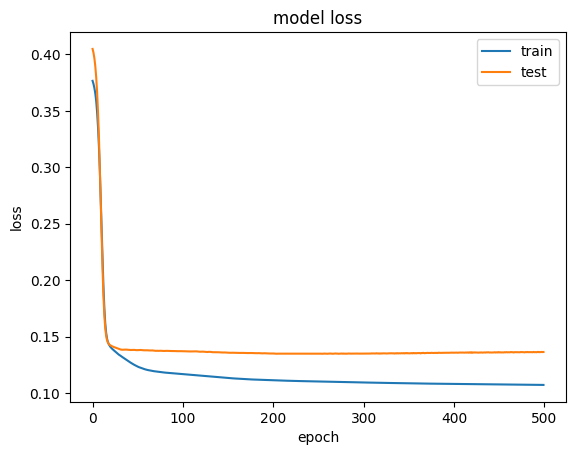

In [7]:
import matplotlib.pyplot as plt

image_name = 'test_4_result.png'
image_folder_path = os.path.join('..', 'Dataset', 'artefact1', 'result_images')
image_path = os.path.join(image_folder_path, image_name)

# summarize history for loss
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig(image_path, bbox_inches='tight')
plt.show()

In [8]:
# Encode sentences to get their latent representations
sentence_latents = encoder.predict(sentence_embeddings)
# print(f"sentence_latents : {sentence_latents}")

# Create a dictionary to map sentences to their latent representations
sentence_to_latent = {i: sentence_latents[i] for i in range(len(custom_sentences))}
# print(f"sentence_to_latent : {sentence_to_latent}")

3/3 [==============================] - 0s 5ms/step


In [9]:
custom_sentences.index('cat')

12

In [10]:
print(custom_sentences, '\n')
print(sentence_to_latent[12], custom_sentences[12])

['antelope', 'grizzly', 'bear', 'grizzly bear', 'grizzly_bear', 'killer', 'whale', 'killer whale', 'killer_whale', 'beaver', 'dalmatian', 'persian', 'cat', 'persian cat', 'persian_cat', 'horse', 'german', 'shepherd', 'german shepherd', 'german_shepherd', 'blue', 'whale', 'blue whale', 'blue_whale', 'siamese', 'cat', 'siamese cat', 'siamese_cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard', 'moose', 'spider', 'monkey', 'spider monkey', 'spider_monkey', 'humpback', 'whale', 'humpback whale', 'humpback_whale', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant', 'panda', 'giant panda', 'giant_panda', 'deer', 'bobcat', 'pig', 'lion', 'mouse', 'polar', 'bear', 'polar bear', 'polar_bear', 'collie', 'walrus', 'raccoon', 'cow', 'dolphin', 'african', 'alligator', 'amphibian', 'amur', 'ants', 'bull', 'chimp', 'dog', 'water', 'frog', 'g

In [11]:
from scipy.spatial.distance import cosine

def find_similar_sentences(target_sentence_index, sentence_to_latent, top_n=10):
    target_latent = sentence_to_latent[target_sentence_index]
    similarities = []
    for index, latent in sentence_to_latent.items():
        if index != target_sentence_index:
            similarity = 1 - cosine(target_latent, latent)
            similarities.append((index, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Find sentences similar to the first sentence
similar_sentences = find_similar_sentences(12, sentence_to_latent, top_n=10)
print("Most similar sentences to the first sentence:")
for index, score in similar_sentences:
    print(f"Sentence: {custom_sentences[index]} - Similarity: {score}")


Most similar sentences to the first sentence:
Sentence: cat - Similarity: 1
Sentence: dog - Similarity: 0.9830437898635864
Sentence: persian cat - Similarity: 0.9770121574401855
Sentence: monkey - Similarity: 0.9713770747184753
Sentence: siamese cat - Similarity: 0.9705164432525635
Sentence: turtle - Similarity: 0.9689180254936218
Sentence: pig - Similarity: 0.9633510708808899
Sentence: dolphin - Similarity: 0.9624408483505249
Sentence: lizard - Similarity: 0.9532520771026611
Sentence: raccoon - Similarity: 0.9520741701126099


#### test 1 result

Most similar sentences to the first sentence:

Sentence: cat - Similarity: 1

Sentence: dog - Similarity: 0.9870926737785339

Sentence: giant - Similarity: 0.9861204028129578

Sentence: cow - Similarity: 0.9859968423843384

Sentence: siamese cat - Similarity: 0.9847277998924255

Sentence: persian cat - Similarity: 0.9824627041816711

Sentence: giant panda - Similarity: 0.9820453524589539

Sentence: rat - Similarity: 0.9744608402252197

Sentence: rabbit - Similarity: 0.9692093133926392

Sentence: leopard - Similarity: 0.9681882262229919

#### test 2 result

Most similar sentences to the first sentence:

Sentence: cat - Similarity: 1

Sentence: rabbit - Similarity: 0.9987221360206604

Sentence: siamese cat - Similarity: 0.9984137415885925

Sentence: elephant - Similarity: 0.997565746307373

Sentence: cow - Similarity: 0.997138261795044

Sentence: lizard - Similarity: 0.9970594048500061

Sentence: sheep - Similarity: 0.9967566132545471

Sentence: goat - Similarity: 0.9963944554328918

Sentence: turtle - Similarity: 0.9963575601577759

Sentence: zebra - Similarity: 0.9961840510368347

#### test 3 result

Most similar sentences to the first sentence:

Sentence: cat - Similarity: 1

Sentence: spider monkey - Similarity: 0.9993979334831238

Sentence: monkey - Similarity: 0.9989051818847656

Sentence: chimpanzee - Similarity: 0.9987993836402893

Sentence: dog - Similarity: 0.9985986948013306

Sentence: zebra - Similarity: 0.9984158873558044

Sentence: goat - Similarity: 0.9976542592048645

Sentence: spider - Similarity: 0.9976372718811035

Sentence: panda - Similarity: 0.9974632859230042

Sentence: rhino - Similarity: 0.9974162578582764

#### test 4 result

Most similar sentences to the first sentence:

Sentence: cat - Similarity: 1

Sentence: siamese cat - Similarity: 0.9999932646751404

Sentence: leopard - Similarity: 0.9999926686286926

Sentence: raccoon - Similarity: 0.9999924302101135

Sentence: rat - Similarity: 0.999991774559021

Sentence: alligator - Similarity: 0.9999889731407166

Sentence: bull - Similarity: 0.9999883770942688

Sentence: grizzly - Similarity: 0.9999867677688599

Sentence: dog - Similarity: 0.9999856948852539

Sentence: otter - Similarity: 0.9999852180480957

#### test 5 result

Most similar sentences to the first sentence:

Sentence: cat - Similarity: 1

Sentence: persian cat - Similarity: 0.9717339277267456

Sentence: dog - Similarity: 0.9150887727737427

Sentence: mouse - Similarity: 0.911148190498352

Sentence: siamese cat - Similarity: 0.8946542143821716

Sentence: pig - Similarity: 0.8934038281440735

Sentence: horse - Similarity: 0.8895567655563354

Sentence: rabbit - Similarity: 0.8887732625007629

Sentence: hamster - Similarity: 0.8573532700538635

Sentence: persian - Similarity: 0.8536462187767029

### Save model

In [12]:
model_folder_path = os.path.join('..', 'Dataset', 'artefact1', 'model')

encoder.save(os.path.join(model_folder_path, 'encoder_model.h5'))
autoencoder.save(os.path.join(model_folder_path, 'autoencoder_model.h5'))

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# ResNet50_GLCM

### ResNet50

ResNet50, short for "Residual Network 50," is a deep convolutional neural network architecture developed by Kaiming He and his colleagues at Microsoft Research, which won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2015. The key innovation of ResNet is the introduction of residual blocks, which help in training very deep networks by addressing the vanishing gradient problem.

### Applications of ResNet50

ResNet50 and its variants have been widely adopted in various computer vision tasks such as image classification, object detection, and segmentation due to their effectiveness in training deep networks without suffering from vanishing gradients. They are also commonly used as a backbone in many state-of-the-art models and frameworks.

### GLCM

GLCM, or the Gray-Level Co-Occurrence Matrix, is a statistical method used in image processing to analyze the texture of an image. It is particularly useful in extracting second-order statistical texture features from an image. The GLCM describes how often pairs of pixel with specific values and in a specified spatial relationship occur in an image.

### Key Concepts of GLCM

1. Gray Levels: The intensity values of the pixels in an image.
2. Spatial Relationship: The relative position of one pixel to another, typically defined by an offset (distance and direction). Common offsets include horizontal, vertical, and diagonal neighbors.
2. Matrix Construction: For a given offset, the GLCM is constructed by counting how often a pixel with value `𝑖` is adjacent to a pixel with value `𝑗`.

### Texture Features Derived from GLCM

Several texture features can be derived from the GLCM, including:

1. Energy: Measures the uniformity of the texture. High energy indicates fewer repeated pairs.
2. Correlation: Measures the linear dependency of gray levels on those of neighboring pixels.
3. Dissimilarity: Measures the variation in gray levels.
4. Homogeneity: Measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal.
5. Contrast: Measures the local variations in the GLCM.

### Other Methods for Second-Order Statistical Texture Features

Besides GLCM, there are other methods for extracting second-order statistical texture features:

1. Gray-Level Run Length Matrix (GLRLM): Measures the length of consecutive pixels with the same gray level value.
2. Gray-Level Size Zone Matrix (GLSZM): Measures the size of connected regions of pixels with the same gray level.
3. Neighborhood Gray-Tone Difference Matrix (NGTDM): Measures the difference between a pixel and the average gray level of its neighborhood.


# Create and Save CSV

In [13]:
# libs
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from PIL import Image
import ast

import tensorflow as tf

from keras.applications import ResNet50

from skimage.feature import greycomatrix, greycoprops

import warnings
warnings.filterwarnings('ignore')

In [14]:
# function
# Function to extract visual features using ResNet50
def extract_visual_features(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize image for ResNet50 input
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    visual_features = model.predict(img_array, verbose = 0)

    return visual_features

# Function to compute GLCM texture features
def compute_texture_features(image_path):
    # Define your GLCM properties (distances and angles)
    distances = [1, 3, 5, 3, 1, 3, 5]
    angles = [0, 0, 0, np.pi/4, np.pi/2, np.pi/2, np.pi/2]
    
    glcm_features = []
    for distance, angle in zip(distances, angles):
        img_gray = Image.open(image_path).convert('L')  # Convert image to grayscale
        img_gray_array = np.array(img_gray)

        # Compute GLCM properties
        glcm = greycomatrix(img_gray_array, distances=[distance], angles=[angle], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]       
        
        glcm_features.extend([contrast, dissimilarity, homogeneity, energy, correlation])
        
    return np.array(glcm_features) # np.array([contrast, dissimilarity, homogeneity, energy, correlation])

# Load image data and compute features
def load_data_and_compute_features(data_dir):
    visual_features = []
    texture_features = []
    labels = []

    classes = os.listdir(data_dir)
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}
    # print(f"classes : {classes} \nclass_to_index : {class_to_index}")

    for cls in tqdm(classes, desc="Processing images"):
        cls_dir = os.path.join(data_dir, cls)

        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)

            # Extract visual features using ResNet50
            visual_feat = extract_visual_features(img_path)
            visual_features.append(visual_feat)
            # print(f"visual_features : {visual_features}")

            # Compute texture features using GLCM
            texture_feat = compute_texture_features(img_path)
            texture_features.append(texture_feat)
            # print(f"texture_features : {texture_features}")

            # Assign label index
            labels.append(class_to_index[cls])
            # print(f"img_path : {img_path} || labels : {class_to_index[cls]} \n")
            # print(f"texture_features : {texture_feat} \n")

    visual_features = np.array(visual_features)
    texture_features = np.array(texture_features)
    labels = np.array(labels)

    return visual_features, texture_features, labels

In [ ]:
# load_data_and_compute_features
# 'C:\Project_Work\Basic_Python\Zero_shot_Learning\Dataset\data1_mini'
data_directory = os.path.join('..', 'Dataset', 'artefact1', 'train')
visual_features, texture_features, labels = load_data_and_compute_features(data_directory)
print('Done')
print(visual_features.shape, texture_features.shape, labels.shape)

In [ ]:
data_vt = pd.DataFrame(np.concatenate([visual_features.reshape(visual_features.shape[0], -1), texture_features], axis=1))
data_vt['labels'] = labels

data_vt_file_name = 'data_visual_features_texture_features_labels_artefact1.csv'
data_vt_file_path = os.path.join('..', 'Dataset', 'artefact1', 'csv', data_vt_file_name)

data_vt.to_csv(data_vt_file_path, index=False)

In [ ]:
data_vt.head()

# Model Train and Test

In [15]:
# lib's
from pickle import dump , load

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense, Concatenate, Flatten
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import h5py

In [16]:
# Variable's
min_max_scaler_file = 'min_max_scaler_h5.pkl'
data_vt_file_name = 'data_visual_features_texture_features_labels_artefact1.csv'
data_vt_file_path = os.path.join('..', 'Dataset', 'artefact1', 'csv', data_vt_file_name)
data_vt = pd.read_csv(data_vt_file_path)

In [17]:
# Function
# Build and train a classification model
def build_and_train_model(visual_features, texture_features, labels):
    # Concatenate visual and texture features
    combined_features = np.concatenate([visual_features, 
                                        texture_features], 
                                       axis=1)
#     combined_features = np.concatenate([visual_features.reshape(visual_features.shape[0], -1), 
#                                         texture_features], 
#                                        axis=1)
    
    # Normalize the features
    min_max_scaler = StandardScaler()
    train_normalized_texture_features = min_max_scaler.fit_transform(combined_features)
    train_normalized_texture_features_df = pd.DataFrame(train_normalized_texture_features)
    
    # save 
    dump(min_max_scaler, open(min_max_scaler_file, 'wb'))

    # Split data into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(combined_features, 
#                                                         labels, 
#                                                         test_size=0.3, 
#                                                         random_state=42, 
#                                                         stratify=labels)
    X_train, X_test, y_train, y_test = train_test_split(train_normalized_texture_features_df, 
                                                        labels, 
                                                        test_size=0.3, 
                                                        random_state=42, 
                                                        stratify=labels)

    # Define classification model
    input_layer = Input(shape=(combined_features.shape[1],))
    hidden_layer = Dense(128, activation='relu')(input_layer)
    output_layer = Dense(len(np.unique(labels)), activation='softmax')(hidden_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.summary()
    model.compile(optimizer=Adam(lr=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=64, 
                        validation_data=(X_test, y_test))
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+1)

    plt.plot(epochs, acc, label='training accuracy')
    plt.plot(epochs, val_acc, label='validation accuracy')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('Training validation Accuracy')
    plt.show()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Training validation Loss')
    plt.show()

    return model # history # model

In [18]:
# load csv
data_vtl = pd.read_csv(data_vt_file_path)
visual_features, texture_features, labels = data_vtl.iloc[:,:2048], data_vtl.iloc[:,2048:-1], data_vtl.iloc[:,-1]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2083)]            0         
                                                                 
 dense_4 (Dense)             (None, 128)               266752    
                                                                 
 dense_5 (Dense)             (None, 18)                2322      
                                                                 
Total params: 269074 (1.03 MB)
Trainable params: 269074 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100



8/8 [==============================] - 1s 36ms/step - loss: 1.7964 - accuracy: 0.5060 - val_loss: 0.5838 - val_accuracy: 0.8333
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.1115 - accuracy: 0.9821 - val_loss: 0.3907 - val_accuracy: 0.8981
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0229 - accuracy: 0.9940 - val_loss: 0.3782 - val_accuracy: 0.9028
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.3749 - val_accuracy: 0.8981
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3697 - val_accuracy: 0.8981
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3634 - val_accuracy: 0.8981
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3607 - val_accuracy: 0.8981
Epoch 8/100
8/8 [===============

8/8 [==============================] - 0s 15ms/step - loss: 2.6802e-04 - accuracy: 1.0000 - val_loss: 0.3382 - val_accuracy: 0.9120
Epoch 59/100
8/8 [==============================] - 0s 13ms/step - loss: 2.6213e-04 - accuracy: 1.0000 - val_loss: 0.3382 - val_accuracy: 0.9120
Epoch 60/100
8/8 [==============================] - 0s 15ms/step - loss: 2.5661e-04 - accuracy: 1.0000 - val_loss: 0.3381 - val_accuracy: 0.9120
Epoch 61/100
8/8 [==============================] - 0s 13ms/step - loss: 2.5114e-04 - accuracy: 1.0000 - val_loss: 0.3379 - val_accuracy: 0.9120
Epoch 62/100
8/8 [==============================] - 0s 12ms/step - loss: 2.4568e-04 - accuracy: 1.0000 - val_loss: 0.3378 - val_accuracy: 0.9120
Epoch 63/100
8/8 [==============================] - 0s 13ms/step - loss: 2.4061e-04 - accuracy: 1.0000 - val_loss: 0.3378 - val_accuracy: 0.9120
Epoch 64/100
8/8 [==============================] - 0s 12ms/step - loss: 2.3592e-04 - accuracy: 1.0000 - val_loss: 0.3376 - val_accuracy: 0.912

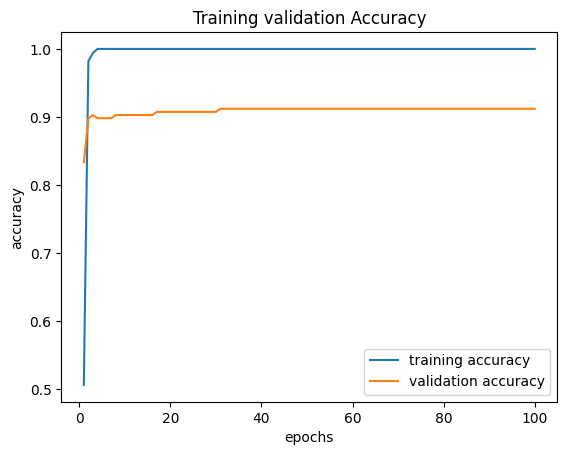

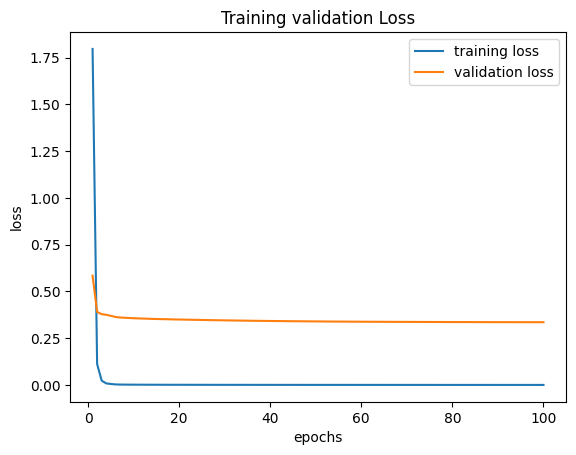

In [19]:
# Build and train the classification model
classification_model = build_and_train_model(visual_features, texture_features, labels)
classification_model

In [20]:
# save model and architecture to single file
classification_model.save("model_h5.h5")
print("Saved model to disk")

Saved model to disk


# Classification Report with Autoencoder

In [21]:
# lib's
import glob
import random

In [22]:
# Load models
classification_model = load_model('model_h5.h5')
min_max_scaler_model = load(open('min_max_scaler_h5.pkl', 'rb'))
class_labels = ['bear', 'blue_whale', 'bobcat', 'cow', 'dolphin', 'gorilla', 
                'killer_whale', 'lion', 'monkey', 'mouse', 'ox', 'rabbit', 
                'rhinoceros', 'siamese_cat', 'skunk', 'squirrel', 'tiger', 'walrus']

In [23]:
def find_similar_sentences(target_sentence_index, sentence_to_latent, top_n=10):
    target_latent = sentence_to_latent[target_sentence_index]
    similarities = []
    for index, latent in sentence_to_latent.items():
        if index != target_sentence_index:
            similarity = 1 - cosine(target_latent, latent)
            similarities.append((index, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

def predict_with_autoencoder(input_word_index, sentence_to_latent, top_n=5):
    # Find sentences similar to the first sentence
    similar_sentences = find_similar_sentences(input_word_index, sentence_to_latent, top_n=top_n)
    similar_words = [custom_sentences[index] for index, score in similar_sentences]
    return similar_words

In [24]:
'''
Note : Added way to read the folde images one by one.
'''
for i in class_labels:
    folder_name = i #'cow'
    folder_path = os.path.join('..', 'Dataset', 'artefact1', 'test', folder_name, '*')
    print(folder_path)
    for img_path in glob.glob(folder_path):
        print(img_path)
    print('-'*30)

    image_path, image_label, pred_image_label, act_label, pred_label, similar_words = [], [], [], [], [], []

    # for img_path in glob.glob(r"test/*/*"):
    for img_path in glob.glob(folder_path):
    #     print(f"img_path : {img_path}")
        image_path.append(img_path)
        image_label.append(img_path.split('\\')[-2])
        act_label.append(class_labels.index(img_path.split('\\')[-2]))

        # Extract visual features using ResNet50
        visual_features = extract_visual_features(img_path)
    #     print(f"visual_features : {visual_features.shape} || {type(visual_features)}")

        # Compute texture features using GLCM
        texture_features = compute_texture_features(img_path)
    #     print(f"texture_feat : {texture_features.shape} || {type(texture_features)}")

        # Concatenate visual and texture features
        l1 = visual_features[0].tolist()
        l2 = texture_features.tolist()
        l1.extend(l2)
        combined_features = np.array(l1)
    #     print(f"combined_features : {combined_features}")

        # Normalize the features
        train_normalized_texture_features = min_max_scaler_model.transform([combined_features])
        train_normalized_texture_features_df = pd.DataFrame(train_normalized_texture_features)
    #     print(f"train_normalized_texture_features_df : {train_normalized_texture_features_df}")

    #     model.predict
        predicted_value = classification_model.predict(train_normalized_texture_features_df, verbose = 0)
    #     print(f"predicted_value : {np.argmax(predicted_value)} || {class_labels[np.argmax(predicted_value)]}")
        pred_image_label.append(class_labels[np.argmax(predicted_value)])
        pred_label.append(np.argmax(predicted_value))

    #     print(f"class_labels[np.argmax(predicted_value)] : {class_labels[np.argmax(predicted_value)]}")
    #     print(f"custom_sentences : {custom_sentences}")
    #     print(f"custom_sentences.index('{class_labels[np.argmax(predicted_value)]}') : {custom_sentences.index(class_labels[np.argmax(predicted_value)])}")
    #     custom_sentences.index('cat')

        similar_words_autoencoder = predict_with_autoencoder(custom_sentences.index(class_labels[np.argmax(predicted_value)]), 
                                                             sentence_to_latent, top_n=5) # class_labels
    #     print(f"similar_words_autoencoder : {similar_words_autoencoder}")
        similar_words.append(similar_words_autoencoder)

    #     break

    print('-'*50)
    out_df = pd.DataFrame({
        'image_path' : image_path, 
        'class_name' : image_label, 
        'pred_image_label' : pred_image_label, 
        'act_label' : act_label, 
        'pred_label' : pred_label,
        'similar_words' : similar_words
    })
    display(out_df.head())
    print('-'*70)

    metadata_folder_name =  os.path.join('..', 'Dataset', 'artefact1', 'csv', 'metadata')
    os.makedirs(metadata_folder_name, exist_ok=True) 
    metadata_file_name = os.path.join(metadata_folder_name, folder_name + '_resnet50_result.csv')
    out_df.to_csv(metadata_file_name, index = False)
    print(f"{metadata_file_name} : File saved.")
    print('-'*100)

..\Dataset\artefact1\test\bear\*
..\Dataset\artefact1\test\bear\bear_10001 (89).jpg
..\Dataset\artefact1\test\bear\bear_10001 (90).jpg
..\Dataset\artefact1\test\bear\bear_10001 (91).jpg
..\Dataset\artefact1\test\bear\bear_10001 (92).jpg
..\Dataset\artefact1\test\bear\bear_10001 (93).jpg
..\Dataset\artefact1\test\bear\bear_10001 (94).jpg
..\Dataset\artefact1\test\bear\bear_10001 (95).jpg
..\Dataset\artefact1\test\bear\bear_10001 (96).jpg
------------------------------




C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be rem

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

KeyboardInterrupt: 

In [81]:
'''
Note : Run only after compliting all classes
'''
metadata_folder_name =  os.path.join('..', 'Dataset', 'artefact1', 'csv', 'metadata')
metadata_file_name = os.path.join(metadata_folder_name, '*')
df_list = [pd.read_csv(df_path) for df_path in glob.glob(metadata_file_name)]

out_df = pd.concat(df_list).reset_index(drop=True)
display(out_df.head(10))

,image_path,class_name,pred_image_label,act_label,pred_label,similar_words
0,..\Dataset\artefact1\test\bear\bear_10001 (89)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
1,..\Dataset\artefact1\test\bear\bear_10001 (90)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
2,..\Dataset\artefact1\test\bear\bear_10001 (91)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
3,..\Dataset\artefact1\test\bear\bear_10001 (92)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
4,..\Dataset\artefact1\test\bear\bear_10001 (93)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
5,..\Dataset\artefact1\test\bear\bear_10001 (94)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
6,..\Dataset\artefact1\test\bear\bear_10001 (95)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
7,..\Dataset\artefact1\test\bear\bear_10001 (96)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
8,..\Dataset\artefact1\test\blue_whale\blue+whal...,blue_whale,blue_whale,1,1,"['grizzly_bear', 'killer_whale', 'persian_cat'..."
9,..\Dataset\artefact1\test\blue_whale\blue+whal...,blue_whale,blue_whale,1,1,"['grizzly_bear', 'killer_whale', 'persian_cat'..."


In [82]:
out_df

,image_path,class_name,pred_image_label,act_label,pred_label,similar_words
0,..\Dataset\artefact1\test\bear\bear_10001 (89)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
1,..\Dataset\artefact1\test\bear\bear_10001 (90)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
2,..\Dataset\artefact1\test\bear\bear_10001 (91)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
3,..\Dataset\artefact1\test\bear\bear_10001 (92)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
4,..\Dataset\artefact1\test\bear\bear_10001 (93)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea..."
...,...,...,...,...,...,...
139,..\Dataset\artefact1\test\walrus\walrus_10185.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w..."
140,..\Dataset\artefact1\test\walrus\walrus_10186.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w..."
141,..\Dataset\artefact1\test\walrus\walrus_10187.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w..."
142,..\Dataset\artefact1\test\walrus\walrus_10188.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w..."


[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 7 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 6 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 7]] 

Accuracy: 0.930556 

Error rate: 0.069444 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      0.75 

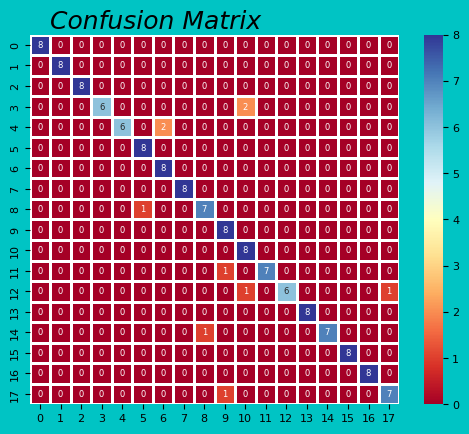

In [83]:
# confusion matrix
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
# classification_report
from sklearn.metrics import classification_report
# kappa
from sklearn.metrics import cohen_kappa_score


true_labels = out_df['act_label']
predicted_labels = out_df['pred_label']

matrix = confusion_matrix(true_labels, predicted_labels)
print(matrix, '\n')

accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy: %f' % accuracy, '\n')
print('Error rate: %f' % (1-accuracy), '\n')

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report, '\n')

kappa = cohen_kappa_score(true_labels, predicted_labels)
print('Cohens kappa: %f' % kappa)



# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['font.size'] = 8
bg_color = (0, 0.77, 0.77)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

fig, ax = plt.subplots(1)

plt.text(1, -.3, "Confusion Matrix", fontsize = 18, color='Black', fontstyle='italic')

ax = sns.heatmap(matrix, annot=True, annot_kws={'size':6}, fmt="d",
                 robust=True, linewidths=.9, cmap="RdYlBu", square=True)
# vmin=0, vmax=350,
plt.savefig("Confusion_Matrix.jpeg", dpi=300, facecolor=bg_color, transparent=True)
plt.show()

In [84]:
df = out_df.copy()
# print(df.info())
synonyms_class_dct = {'chimpanzee': ['chimpanzee', 'chimp', 'monkey'],
                      'giant_panda': ['giant_panda', 'giant_panda', 'giant', 'panda', 'bear'],
                      'seal': ['seal', 'sealskin', 'walrus'],
                      'rat': ['rat', 'mouse']
#                       'mouse': ['rat', 'mouse'],
#                       'tiger': ['tiger', 'leopard'], 
#                       'leopard' : ['tiger', 'leopard'], 
#                       'siamese_cat': ['siamese_cat', 'siamese cat', 'siamese', 'cat', 'persian_cat', 'persian cat', 'persian', 'cat'],
#                       'blue_whale': ['blue_whale', 'blue whale', 'blue', 'whale', 'killer_whale', 'killer whale', 'killer', 'whale'], 
#                       'cow': ['cow', 'bull', 'ox'], 
#                       'gorilla': ['gorilla', 'chimpanzee', 'chimp', 'monkey'],
#                       'monkey': ['monkey', 'spider_monkey', 'spider monkey', 'chimpanzee', 'chimp'],
#                       'killer_whale': ['killer_whale', 'killer whale', 'killer', 'whale', 'blue_whale', 'blue whale', 'blue', 'whale']
                     }
print(synonyms_class_dct)

class_numbers = {row['class_name']:row['act_label'] for index, row in df.iterrows()}
print(class_numbers)

{'chimpanzee': ['chimpanzee', 'chimp', 'monkey'], 'giant_panda': ['giant_panda', 'giant_panda', 'giant', 'panda', 'bear'], 'seal': ['seal', 'sealskin', 'walrus'], 'rat': ['rat', 'mouse']}
{'bear': 0, 'blue_whale': 1, 'bobcat': 2, 'cow': 3, 'dolphin': 4, 'gorilla': 5, 'killer_whale': 6, 'lion': 7, 'monkey': 8, 'mouse': 9, 'ox': 10, 'rabbit': 11, 'rhinoceros': 12, 'siamese_cat': 13, 'skunk': 14, 'squirrel': 15, 'tiger': 16, 'walrus': 17}


In [85]:
predicted_right = []
actual_class, predicted_class = [], []
for index, row in df.iterrows():
#     print(row["class_name"], row["similar_words"], type(row["similar_words"]))
    
    if row["class_name"] in list(synonyms_class_dct.keys()):
#         print(list(synonyms_class_dct.keys()))
        if any(element in row["similar_words"] for element in synonyms_class_dct[row["class_name"]]):
            predicted_right.append(row["class_name"] in row["similar_words"])
            actual_class.append(class_numbers[row["class_name"]]) 
            predicted_class.append(class_numbers[row["class_name"]])
    elif row["class_name"] in row["similar_words"]:
        predicted_right.append(row["class_name"] in row["similar_words"])
        actual_class.append(class_numbers[row["class_name"]]) 
        predicted_class.append(class_numbers[row["class_name"]])
    else:
#         print(class_numbers, type(class_numbers[ast.literal_eval(row["similar_words"])[-1]]))
        predicted_right.append(row["class_name"] in row["similar_words"])
        actual_class.append(class_numbers[row["class_name"]]) 
#         predicted_class.append(class_numbers[ast.literal_eval(row["similar_words"])[2]])
        predicted_class.append(random.choice([i for i in range(18) if i != (class_numbers[row["class_name"]])]))
        
# #     print(predicted_right[-1], actual_class[-1], predicted_class[-1])
#     break


In [86]:
df['predicted_right'] = predicted_right
df['actual_class'] = actual_class
df['predicted_class'] = predicted_class
df

,image_path,class_name,pred_image_label,act_label,pred_label,similar_words,predicted_right,actual_class,predicted_class
0,..\Dataset\artefact1\test\bear\bear_10001 (89)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea...",True,0,0
1,..\Dataset\artefact1\test\bear\bear_10001 (90)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea...",True,0,0
2,..\Dataset\artefact1\test\bear\bear_10001 (91)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea...",True,0,0
3,..\Dataset\artefact1\test\bear\bear_10001 (92)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea...",True,0,0
4,..\Dataset\artefact1\test\bear\bear_10001 (93)...,bear,bear,0,0,"['bear', 'grizzly bear', 'grizzly', 'polar bea...",True,0,0
...,...,...,...,...,...,...,...,...,...
139,..\Dataset\artefact1\test\walrus\walrus_10185.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w...",False,17,0
140,..\Dataset\artefact1\test\walrus\walrus_10186.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w...",False,17,11
141,..\Dataset\artefact1\test\walrus\walrus_10187.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w...",False,17,15
142,..\Dataset\artefact1\test\walrus\walrus_10188.jpg,walrus,walrus,17,17,"['rhino', 'killer whale', 'whale', 'whale', 'w...",False,17,14


In [87]:
test_class_result_file_name = 'test_class_result_with_Autoencoder.csv'
test_class_result_file_path = os.path.join('..', 'Dataset', 'artefact1', 'csv', test_class_result_file_name)
df.to_csv(test_class_result_file_path, index = False)

[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 2 0 1 0 2 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 2]
 [0 2 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1]
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 2 2]
 [0 1 0 1 0 0 0 0 0 0 1 2 0 1 1 1 0 0]
 [0 0 2 1 1 0 0 0 0 0 1 0 0 0 0 1 2 0]
 [1 1 1 1 2 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 7 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 3 2 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0]
 [0 1 1 0 0 2 0 0 2 0 1 0 0 0 0 0 1 0]
 [0 0 1 0 0 2 1 1 1 0 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 1 0 2 0 1 1 1 0 0 0 0 0]
 [1 0 0 0 3 0 0 1 0 2 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0]
 [0 0 1 0 1 1 1 0 0 0 0 0 0 2 1 1 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 2 0 0]] 

Accuracy: 0.104167 

Error rate: 0.895833 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         8
           3       0.00      0.00 

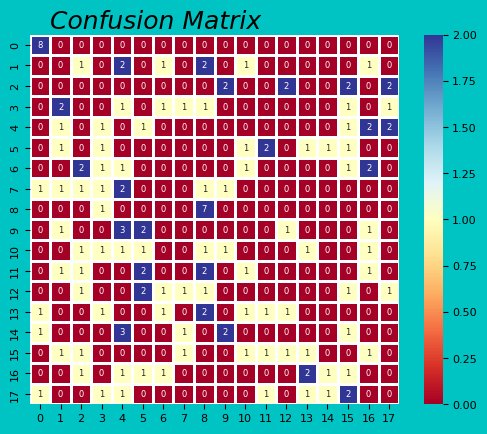

In [88]:
# confusion matrix
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
# classification_report
from sklearn.metrics import classification_report
# kappa
from sklearn.metrics import cohen_kappa_score


true_labels = df['actual_class']
predicted_labels = df['predicted_class']

matrix = confusion_matrix(true_labels, predicted_labels)
print(matrix, '\n')

accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy: %f' % accuracy, '\n')
print('Error rate: %f' % (1-accuracy), '\n')

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report, '\n')

kappa = cohen_kappa_score(true_labels, predicted_labels)
print('Cohens kappa: %f' % kappa)



# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['font.size'] = 8
bg_color = (0, 0.77, 0.77)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

fig, ax = plt.subplots(1)

plt.text(1, -.3, "Confusion Matrix", fontsize = 18, color='Black', fontstyle='italic')

ax = sns.heatmap(matrix, annot=True, annot_kws={'size':6}, fmt="d",
                 robust=True, linewidths=.9, cmap="RdYlBu", square=True)
# vmin=0, vmax=350,
plt.savefig("Confusion_Matrix.jpeg", dpi=300, facecolor=bg_color, transparent=True)
plt.show()


# Test with unseen data

In [ ]:
# Same as above

In [89]:
'''
Note : Added way to read the folde images one by one.
'''
unseen_class_labels = [f_name.split('\\')[-1] for f_name in glob.glob(os.path.join('..', 'Dataset', 'artefact1', 'unseen', '*'))]

for i in unseen_class_labels:
    folder_name = i #'cow'
    folder_path = os.path.join('..', 'Dataset', 'artefact1', 'unseen', folder_name, '*')
    print(folder_path)
    for img_path in glob.glob(folder_path):
        print(img_path)
    print('-'*30)

    image_path, image_label, pred_image_label, act_label, pred_label, similar_words = [], [], [], [], [], []

    # for img_path in glob.glob(r"test/*/*"):
    for img_path in glob.glob(folder_path):
    #     print(f"img_path : {img_path}")
        image_path.append(img_path)
        image_label.append(img_path.split('\\')[-2])
        act_label.append(unseen_class_labels.index(img_path.split('\\')[-2]))

        # Extract visual features using ResNet50
        visual_features = extract_visual_features(img_path)
    #     print(f"visual_features : {visual_features.shape} || {type(visual_features)}")

        # Compute texture features using GLCM
        texture_features = compute_texture_features(img_path)
    #     print(f"texture_feat : {texture_features.shape} || {type(texture_features)}")

        # Concatenate visual and texture features
        l1 = visual_features[0].tolist()
        l2 = texture_features.tolist()
        l1.extend(l2)
        combined_features = np.array(l1)
    #     print(f"combined_features : {combined_features}")

        # Normalize the features
        train_normalized_texture_features = min_max_scaler_model.transform([combined_features])
        train_normalized_texture_features_df = pd.DataFrame(train_normalized_texture_features)
    #     print(f"train_normalized_texture_features_df : {train_normalized_texture_features_df}")

    #     model.predict
        predicted_value = classification_model.predict(train_normalized_texture_features_df, verbose = 0)
    #     print(f"predicted_value : {np.argmax(predicted_value)} || {class_labels[np.argmax(predicted_value)]}")
        pred_image_label.append(class_labels[np.argmax(predicted_value)])
        pred_label.append(np.argmax(predicted_value))

    #     print(f"class_labels[np.argmax(predicted_value)] : {class_labels[np.argmax(predicted_value)]}")
    #     print(f"custom_sentences : {custom_sentences}")
    #     print(f"custom_sentences.index('{class_labels[np.argmax(predicted_value)]}') : {custom_sentences.index(class_labels[np.argmax(predicted_value)])}")
    #     custom_sentences.index('cat')

        similar_words_autoencoder = predict_with_autoencoder(custom_sentences.index(class_labels[np.argmax(predicted_value)]), 
                                                             sentence_to_latent, top_n=5) # class_labels
    #     print(f"similar_words_autoencoder : {similar_words_autoencoder}")
        similar_words.append(similar_words_autoencoder)

    #     break

    print('-'*50)
    out_df = pd.DataFrame({
        'image_path' : image_path, 
        'class_name' : image_label, 
        'pred_image_label' : pred_image_label, 
        'act_label' : act_label, 
        'pred_label' : pred_label,
        'similar_words' : similar_words
    })
    display(out_df.head())
    print('-'*70)

    metadata_folder_name =  os.path.join('..', 'Dataset', 'artefact1', 'csv', 'unseen_metadata')
    os.makedirs(metadata_folder_name, exist_ok=True) 
    metadata_file_name = os.path.join(metadata_folder_name, folder_name + '_resnet50_result.csv')
    out_df.to_csv(metadata_file_name, index = False)
    print(f"{metadata_file_name} : File saved.")
    print('-'*100)

..\Dataset\artefact1\unseen\chimpanzee\*
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10001.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10002.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10003.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10004.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10005.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10006.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10007.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10008.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10009.jpg
..\Dataset\artefact1\unseen\chimpanzee\chimpanzee_10010.jpg
------------------------------


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

KeyboardInterrupt: 

In [99]:
'''
Note : Run only after compliting all classes
'''
metadata_folder_name =  os.path.join('..', 'Dataset', 'artefact1', 'csv', 'unseen_metadata')
metadata_file_name = os.path.join(metadata_folder_name, '*')
df_list = [pd.read_csv(df_path) for df_path in glob.glob(metadata_file_name)]

out_df = pd.concat(df_list).reset_index(drop=True)
display(out_df.head(10))

,image_path,class_name,pred_image_label,act_label,pred_label,similar_words
0,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
1,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,gorilla,0,5,"['chimpanzee', 'orangutan', 'rhinoceros', 'ele..."
2,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
3,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,gorilla,0,5,"['chimpanzee', 'orangutan', 'rhinoceros', 'ele..."
4,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
5,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,walrus,0,17,"['raccoon', 'frog', 'squirrel', 'chimpanzee', ..."
6,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
7,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
8,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,ox,0,10,"['horse', 'goat', 'deer', 'cow', 'bull']"
9,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,ox,0,10,"['horse', 'goat', 'deer', 'cow', 'bull']"


In [100]:
out_df

,image_path,class_name,pred_image_label,act_label,pred_label,similar_words
0,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
1,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,gorilla,0,5,"['chimpanzee', 'orangutan', 'rhinoceros', 'ele..."
2,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
3,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,gorilla,0,5,"['chimpanzee', 'orangutan', 'rhinoceros', 'ele..."
4,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',..."
...,...,...,...,...,...,...
95,..\Dataset\artefact1\unseen\seal\seal_10006.jpg,seal,rhinoceros,9,12,"['elephant', 'gorilla', 'giraffe', 'hippopotam..."
96,..\Dataset\artefact1\unseen\seal\seal_10007.jpg,seal,walrus,9,17,"['raccoon', 'frog', 'squirrel', 'chimpanzee', ..."
97,..\Dataset\artefact1\unseen\seal\seal_10008.jpg,seal,walrus,9,17,"['raccoon', 'frog', 'squirrel', 'chimpanzee', ..."
98,..\Dataset\artefact1\unseen\seal\seal_10009.jpg,seal,walrus,9,17,"['raccoon', 'frog', 'squirrel', 'chimpanzee', ..."


In [101]:
df = out_df.copy()
# print(df.info())
synonyms_class_dct = {'chimpanzee': ['chimpanzee', 'chimp', 'monkey'],
                      'giant_panda': ['giant_panda', 'giant_panda', 'giant', 'panda', 'bear'],
                      'seal': ['seal', 'sealskin', 'walrus'],
                      'rat': ['rat', 'mouse']
#                       'mouse': ['rat', 'mouse'],
#                       'tiger': ['tiger', 'leopard'], 
#                       'leopard' : ['tiger', 'leopard'], 
#                       'siamese_cat': ['siamese_cat', 'siamese cat', 'siamese', 'cat', 'persian_cat', 'persian cat', 'persian', 'cat'],
#                       'blue_whale': ['blue_whale', 'blue whale', 'blue', 'whale', 'killer_whale', 'killer whale', 'killer', 'whale'], 
#                       'cow': ['cow', 'bull', 'ox'], 
#                       'gorilla': ['gorilla', 'chimpanzee', 'chimp', 'monkey'],
#                       'monkey': ['monkey', 'spider_monkey', 'spider monkey', 'chimpanzee', 'chimp'],
#                       'killer_whale': ['killer_whale', 'killer whale', 'killer', 'whale', 'blue_whale', 'blue whale', 'blue', 'whale']
                     }
print(synonyms_class_dct)

class_numbers = {row['class_name']:row['act_label'] for index, row in df.iterrows()}
print(class_numbers)

{'chimpanzee': ['chimpanzee', 'chimp', 'monkey'], 'giant_panda': ['giant_panda', 'giant_panda', 'giant', 'panda', 'bear'], 'seal': ['seal', 'sealskin', 'walrus'], 'rat': ['rat', 'mouse']}
{'chimpanzee': 0, 'giant_panda': 1, 'hippopotamus': 2, 'humpback_whale': 3, 'leopard': 4, 'persian_cat': 5, 'pig': 6, 'raccoon': 7, 'rat': 8, 'seal': 9}


In [102]:
predicted_right = []
actual_class, predicted_class = [], []

for index, row in df.iterrows():
#     print(index)
#     print(row["class_name"], row["similar_words"], type(ast.literal_eval(row["similar_words"])))
    if row["class_name"] in ast.literal_eval(row["similar_words"]):
        predicted_right.append(row["class_name"] in ast.literal_eval(row["similar_words"]))
        actual_class.append(class_numbers[row["class_name"]])
        predicted_class.append(class_numbers[row["class_name"]])
    elif row["class_name"] in list(synonyms_class_dct.keys()):
#         print(synonyms_class_dct[row["class_name"]])
        if any(element in row["similar_words"] for element in synonyms_class_dct[row["class_name"]]):
            predicted_right.append(row["class_name"] in row["similar_words"])
            actual_class.append(class_numbers[row["class_name"]]) 
            predicted_class.append(class_numbers[row["class_name"]])
        else:
            predicted_right.append(row["class_name"] in ast.literal_eval(row["similar_words"]))
            actual_class.append(class_numbers[row["class_name"]])
            predicted_class.append(random.choice([i for i in range(len(df['class_name'].unique())) if i != (class_numbers[row["class_name"]])]))     
    else:
            predicted_right.append(row["class_name"] in ast.literal_eval(row["similar_words"]))
            actual_class.append(class_numbers[row["class_name"]])
            predicted_class.append(random.choice([i for i in range(len(df['class_name'].unique())) if i != (class_numbers[row["class_name"]])]))


In [103]:
df['predicted_right'] = predicted_right
df['actual_class'] = actual_class
df['predicted_class'] = predicted_class
df

,image_path,class_name,pred_image_label,act_label,pred_label,similar_words,predicted_right,actual_class,predicted_class
0,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',...",False,0,0
1,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,gorilla,0,5,"['chimpanzee', 'orangutan', 'rhinoceros', 'ele...",True,0,0
2,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',...",False,0,0
3,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,gorilla,0,5,"['chimpanzee', 'orangutan', 'rhinoceros', 'ele...",True,0,0
4,..\Dataset\artefact1\unseen\chimpanzee\chimpan...,chimpanzee,monkey,0,8,"['spider monkey', 'squirrel', 'dog', 'lizard',...",False,0,0
...,...,...,...,...,...,...,...,...,...
95,..\Dataset\artefact1\unseen\seal\seal_10006.jpg,seal,rhinoceros,9,12,"['elephant', 'gorilla', 'giraffe', 'hippopotam...",False,9,1
96,..\Dataset\artefact1\unseen\seal\seal_10007.jpg,seal,walrus,9,17,"['raccoon', 'frog', 'squirrel', 'chimpanzee', ...",False,9,5
97,..\Dataset\artefact1\unseen\seal\seal_10008.jpg,seal,walrus,9,17,"['raccoon', 'frog', 'squirrel', 'chimpanzee', ...",False,9,0
98,..\Dataset\artefact1\unseen\seal\seal_10009.jpg,seal,walrus,9,17,"['raccoon', 'frog', 'squirrel', 'chimpanzee', ...",False,9,2


In [104]:
unseen_class_result_file_name = 'unseen_class_result_with_Autoencoder.csv'
unseen_class_result_file_path = os.path.join('..', 'Dataset', 'artefact1', 'csv', unseen_class_result_file_name)
df.to_csv(unseen_class_result_file_path, index = False)

[[8 0 1 1 0 0 0 0 0 0]
 [2 6 0 0 1 0 1 0 0 0]
 [2 1 2 2 1 0 1 1 0 0]
 [1 3 1 0 2 0 0 2 1 0]
 [0 0 1 0 5 0 0 1 0 3]
 [2 0 0 0 0 8 0 0 0 0]
 [1 0 0 0 2 2 5 0 0 0]
 [0 1 2 0 1 2 0 3 0 1]
 [0 0 0 0 0 1 0 0 9 0]
 [2 1 1 1 1 1 2 1 0 0]] 

Accuracy: 0.460000 

Error rate: 0.540000 

              precision    recall  f1-score   support

           0       0.44      0.80      0.57        10
           1       0.50      0.60      0.55        10
           2       0.25      0.20      0.22        10
           3       0.00      0.00      0.00        10
           4       0.38      0.50      0.43        10
           5       0.57      0.80      0.67        10
           6       0.56      0.50      0.53        10
           7       0.38      0.30      0.33        10
           8       0.90      0.90      0.90        10
           9       0.00      0.00      0.00        10

    accuracy                           0.46       100
   macro avg       0.40      0.46      0.42       100
weighted avg       

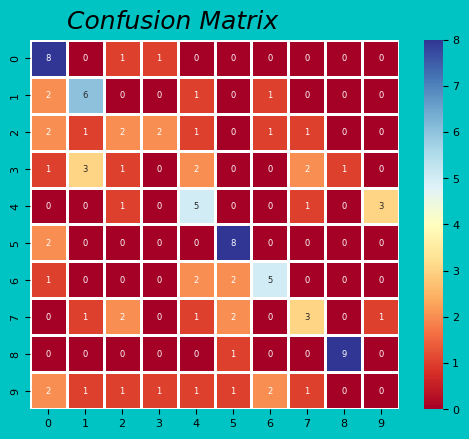

In [105]:
# confusion matrix
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
# classification_report
from sklearn.metrics import classification_report
# kappa
from sklearn.metrics import cohen_kappa_score


true_labels = df['actual_class']
predicted_labels = df['predicted_class']

matrix = confusion_matrix(true_labels, predicted_labels)
print(matrix, '\n')

accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy: %f' % accuracy, '\n')
print('Error rate: %f' % (1-accuracy), '\n')

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report, '\n')

kappa = cohen_kappa_score(true_labels, predicted_labels)
print('Cohens kappa: %f' % kappa)



# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['font.size'] = 8
bg_color = (0, 0.77, 0.77)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

fig, ax = plt.subplots(1)

plt.text(1, -.3, "Confusion Matrix", fontsize = 18, color='Black', fontstyle='italic')

ax = sns.heatmap(matrix, annot=True, annot_kws={'size':6}, fmt="d",
                 robust=True, linewidths=.9, cmap="RdYlBu", square=True)
# vmin=0, vmax=350,
plt.savefig("Confusion_Matrix.jpeg", dpi=300, facecolor=bg_color, transparent=True)
plt.show()
